# Código anterior

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/users/memobarbosa/Análisis de datos/Parte 2/M20 - Exploratory Data Analysis Kaggle Project 2')

# Se usa la función read_csv para leer los archivos .csv que traen los datos de cada mes
df1 = pd.read_csv('Sales_January_2019.csv')
df2 = pd.read_csv('Sales_February_2019.csv')
df3 = pd.read_csv('Sales_March_2019.csv')
df4 = pd.read_csv('Sales_April_2019.csv')
df5 = pd.read_csv('Sales_May_2019.csv')
df6 = pd.read_csv('Sales_June_2019.csv')
df7 = pd.read_csv('Sales_July_2019.csv')
df8 = pd.read_csv('Sales_August_2019.csv')
df9 = pd.read_csv('Sales_September_2019.csv')
df10 = pd.read_csv('Sales_October_2019.csv')
df11 = pd.read_csv('Sales_November_2019.csv')
df12 = pd.read_csv('Sales_December_2019.csv')

df = df1 # Genera un dataset donde al final se van a compilar todos los anteriores
df['Month'] = '2019-01-01' # Genera un campo de fecha

# February
df = pd.concat([df, df2], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-02-01')
# March
df = pd.concat([df, df3], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-03-01')
# April
df = pd.concat([df, df4], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-04-01')
# May
df = pd.concat([df, df5], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-05-01')
# June
df = pd.concat([df, df6], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-06-01')
# July
df = pd.concat([df, df7], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-07-01')
# August
df = pd.concat([df, df8], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-08-01')
# September
df = pd.concat([df, df9], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-09-01')
# October
df = pd.concat([df, df10], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-10-01')
# November
df = pd.concat([df, df11], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-11-01')
# December
df = pd.concat([df, df12], ignore_index=True)
df['Month'] = df['Month'].fillna('2019-12-01')

df = df.dropna(how='all') # Elimina nulos
df = df[df['Order Date'].str[0:2] != 'Or'] # Eliminar cadenas especiales para la fecha del pedido

# Todos los datos son de tipo object, lo cual nos dificultaría las cosas
# Se cambia el tipo de datos para facilitar el procesamiento.
# convert the 'Date' column to datetime format
df['Month'] = pd.to_datetime(df['Month'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Conversión de las columnas numéricas
df['Order ID'] = df['Order ID'].astype('string')
df['Product'] = df['Product'].astype('string')
df['Quantity Ordered'] = df['Quantity Ordered'].fillna(0)
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df['Purchase Address'] = df['Purchase Address'].astype('string')

missing_values_count = df.isnull().sum() # Número de datos vacíos por columna

# Calcula el % total de datos no existentes. Cuántos datos totales tenemos, y cuántos missing
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100 # Cálculo del %
print(f"Porcentaje de Datos que no existen: {percent_missing:.2f} %")

/var/folders/kc/sj9l8byj6ssgcctgfvyh7gx80000gn/T/ipykernel_30329/3182854175.py:67: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


Porcentaje de Datos que no existen: 0.21 %


In [2]:
# Elimina todos los registros donde la orden sea 0, que al parecer tienen algún problema
df = df[df['Quantity Ordered'] > 0]

# Número de datos vacíos por columna
missing_values_count = df.isnull().sum()

# Ver las estadísticas de las columnas. Por cada columna del DF, se muestran las estadísticas principales
pd.options.display.float_format = '{:.2f}'.format # Cómo quitar el formato científico de algunas columnas

# Se genera la columna zipcode, tomando los últimos 5 dígitos de la dirección
df['zipcode'] = df['Purchase Address'].str[-6:]
df['zipcode'] = df['zipcode'].astype('string') # Cambia el tipo de datos del zipcode

# Se cuenta el número de zipcodes. Se puede aplicar a todas las columnas de ser necesario.
num_zipcodes = df['zipcode'].unique().__len__()

# Look for null values in all columns of the dataframe
print('There are', df.isnull().sum().sum(), 'missing values.')

There are 0 missing values.


# Análisis Correlación

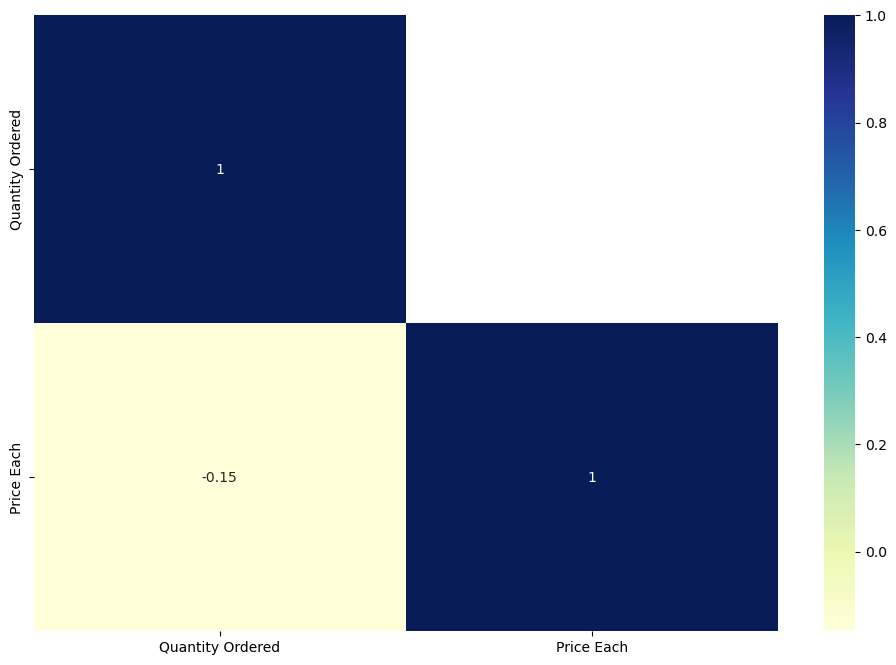

In [4]:
# Correlation graphic
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

plt.figure(figsize=(12,8))
corr_df = corr = df.select_dtypes(include=numerics).corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='YlGnBu', annot=True)

In [5]:
# Visualize columns and number of columns
print('List of Columns')
print('------------------------------------------------------------------------------')
print(df.columns)
print(len(df.columns), 'columns.')

# Numerical columns (19)
cols_num = ['Quantity Ordered', 'Price Each']

List of Columns
------------------------------------------------------------------------------
Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'zipcode'],
      dtype='object')
8 columns.


/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/memobarbosa/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


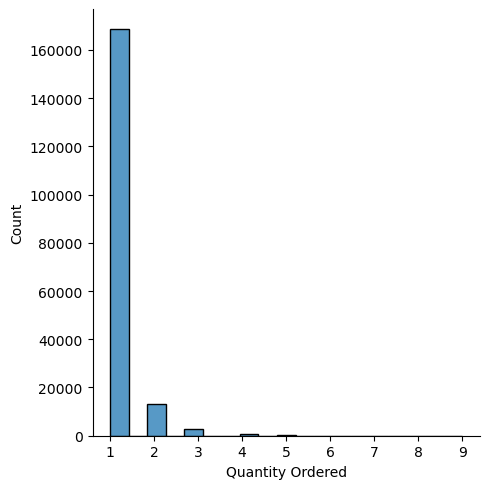

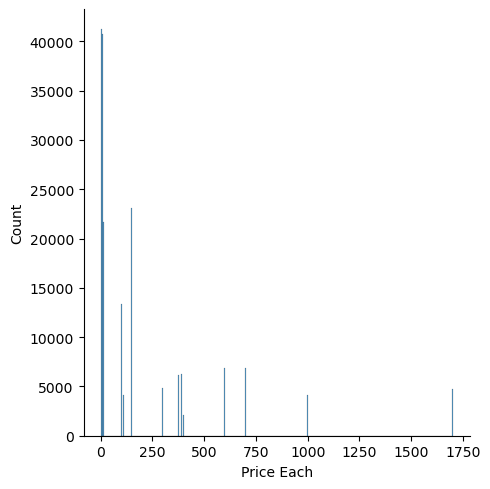

In [6]:
# Gráfica exploratoria de todas las columnas
sns.displot(df['Quantity Ordered'], kde=False)
sns.displot(df['Price Each'], kde=False)

# Agrupamientos

In [9]:
# Agrupamiento general por variables: Month
df.groupby(['Month'])[cols_num].mean()

,Quantity Ordered,Price Each
Month,,
2019-01-01,1.12,186.45
2019-02-01,1.12,182.74
2019-03-01,1.12,184.32
2019-04-01,1.12,184.43
2019-05-01,1.13,188.90
2019-06-01,1.13,189.03
2019-07-01,1.12,184.15
2019-08-01,1.12,186.53
2019-09-01,1.13,179.40


In [11]:
# Agrupamiento general por variables: Product
# La mediana de cada orden es de un producto, con diferentes precios por cada producto
df.groupby(['Product'])[cols_num].median()

,Quantity Ordered,Price Each
Product,,
20in Monitor,1.00,109.99
27in 4K Gaming Monitor,1.00,389.99
27in FHD Monitor,1.00,149.99
34in Ultrawide Monitor,1.00,379.99
AA Batteries (4-pack),1.00,3.84
AAA Batteries (4-pack),1.00,2.99
Apple Airpods Headphones,1.00,150.00
Bose SoundSport Headphones,1.00,99.99
Flatscreen TV,1.00,300.00


<Axes: xlabel='Product'>

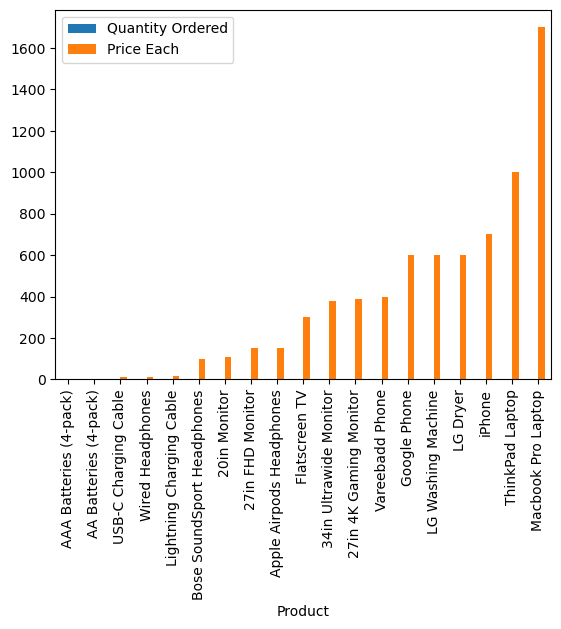

In [12]:
df.groupby(['Product'])[cols_num].median().sort_values(by='Price Each').plot.bar()

In [14]:
# Se generan grupos: Monitor, Batteries, Headphones, Phone, Cable, Others (TV, Dryer).
# Primero se añade una columna en blanco.
df['ProductGroup'] = ''

# Luego se asignan los grupos a cada variable
df.loc[(df['Product'] == '20in Monitor'), 'ProductGroup'] = 'Monitor'
df.loc[(df['Product'] == '27in 4K Gaming Monitor'), 'ProductGroup'] = 'Monitor'
df.loc[(df['Product'] == '27in FHD Monitor'), 'ProductGroup'] = 'Monitor'
df.loc[(df['Product'] == '34in Ultrawide Monitor'), 'ProductGroup'] = 'Monitor'
df.loc[(df['Product'] == 'AA Batteries (4-pack)'), 'ProductGroup'] = 'Batteries'
df.loc[(df['Product'] == 'AAA Batteries (4-pack)'), 'ProductGroup'] = 'Batteries'
df.loc[(df['Product'] == 'Apple Airpods Headphones'), 'ProductGroup'] = 'Monitor'
df.loc[(df['Product'] == 'Bose SoundSport Headphones'), 'ProductGroup'] = 'Monitor'
df.loc[(df['Product'] == 'Flatscreen TV'), 'ProductGroup'] = 'Monitor'
df.loc[(df['Product'] == 'Google Phone'), 'ProductGroup'] = 'Headphone'
df.loc[(df['Product'] == 'LG Dryer'), 'ProductGroup'] = 'Other'
df.loc[(df['Product'] == 'LG Washing Machine'), 'ProductGroup'] = 'Other'
df.loc[(df['Product'] == 'Lightning Charging Cable'), 'ProductGroup'] = 'Cable'
df.loc[(df['Product'] == 'Macbook Pro Laptop'), 'ProductGroup'] = 'Laptop'
df.loc[(df['Product'] == 'ThinkPad Laptop'), 'ProductGroup'] = 'Laptop'
df.loc[(df['Product'] == 'USB-C Charging Cable'), 'ProductGroup'] = 'Cable'
df.loc[(df['Product'] == 'Vareebadd Phone'), 'ProductGroup'] = 'Phone'
df.loc[(df['Product'] == 'Wired Headphones'), 'ProductGroup'] = 'Headphone'
df.loc[(df['Product'] == 'iPhone'), 'ProductGroup'] = 'Phone'

# Agrupamiento general por variables: ProductGroup
df.groupby(['ProductGroup'])[cols_num].median()

,Quantity Ordered,Price Each
ProductGroup,,
Batteries,1.00,2.99
Cable,1.00,11.95
Headphone,1.00,11.99
Laptop,1.00,1700.00
Monitor,1.00,150.00
Other,1.00,600.00
Phone,1.00,700.00


In [16]:
# Zipcode
df.groupby(['zipcode'])[cols_num].mean()

,Quantity Ordered,Price Each
zipcode,,
02215,1.13,182.47
04101,1.12,182.15
10001,1.12,186.34
30301,1.12,186.81
73301,1.13,182.72
75001,1.13,185.74
90001,1.12,183.13
94016,1.12,183.57
97035,1.13,185.87


In [17]:
df.groupby(['ProductGroup', 'zipcode'])[cols_num].mean()

Quantity Ordered  Price Each
ProductGroup zipcode                              
Batteries    02215                1.43        3.41
             04101                1.41        3.46
             10001                1.42        3.41
             30301                1.40        3.42
             73301                1.43        3.41
...                                ...         ...
Phone        75001                1.00      623.39
             90001                1.00      633.68
             94016                1.00      631.31
             97035                1.00      632.70
             98101                1.00      625.83

[70 rows x 2 columns]

# Análisis Bivariado

In [18]:
# Análisis Bivariado de número de ventas por mes y por zipcode
pd.crosstab(df['zipcode'], df['Month'])

Month,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
zipcode,,,,,,,,,,,,
02215,1048,1256,1648,1918,1800,1392,1552,1245,1283,2176,1918,2698
04101,123,177,188,243,222,197,199,165,145,251,230,315
10001,1303,1611,1981,2434,2268,1776,1930,1626,1536,2648,2355,3408
30301,786,936,1245,1472,1331,1104,1146,941,915,1605,1412,1988
73301,527,626,840,973,839,715,762,649,666,1090,868,1350
75001,785,981,1202,1350,1420,1066,1098,968,935,1639,1371,2005
90001,1529,1901,2456,3026,2568,2201,2235,1867,1884,3294,2750,3894
94016,2354,2912,3597,4437,3921,3304,3530,2833,2734,4767,4322,6021
97035,500,659,795,994,944,745,720,657,594,1135,934,1333


<Axes: xlabel='Month'>

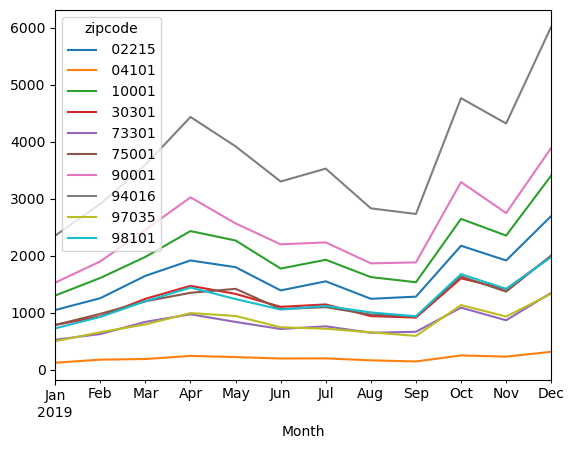

In [19]:
# La misma tabla, pero ahora con gráfico de líneas
pd.crosstab(df['Month'], df['zipcode']).plot()

# Descubrimientos

In [20]:
# Antes que nada, generamos un campo de ventas (que no existe)
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,zipcode,ProductGroup,Total Sales
16508,156974,AAA Batteries (4-pack),1,2.99,2019-02-28 19:26:00,"52 Dogwood St, Los Angeles, CA 90001",2019-02-01,90001,Batteries,2.99
88225,225404,Macbook Pro Laptop,1,1700.00,2019-07-23 13:38:00,"245 Dogwood St, Boston, MA 02215",2019-07-01,02215,Laptop,1700.00
159805,293834,Lightning Charging Cable,1,14.95,2019-11-17 13:02:00,"762 13th St, San Francisco, CA 94016",2019-11-01,94016,Cable,14.95
105373,241828,27in FHD Monitor,1,149.99,2019-08-29 14:44:00,"216 12th St, Los Angeles, CA 90001",2019-08-01,90001,Monitor,149.99
15799,156292,Macbook Pro Laptop,1,1700.00,2019-02-27 23:40:00,"109 Church St, Atlanta, GA 30301",2019-02-01,30301,Laptop,1700.00


# Descubrimientos
- Top Productos por Ventas.
- Productos con Mayor Crecimiento.
- Vistas de ventas de productos por cada uno de ellos.

In [21]:
# Producto con Mayor y Menor Crecimiento. Primero obtenemos las ventas por producto.
pd.crosstab(df['Product'], df['Month'], values=df['Total Sales'], aggfunc='sum', margins=True)

Month,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,All
Product,,,,,,,,,,,,,
20in Monitor,23647.85,27057.54,35856.74,43446.05,37396.60,35306.79,35966.73,28817.38,30467.23,47075.72,46305.79,62804.29,454148.71
27in 4K Gaming Monitor,121676.88,166915.72,186805.21,220344.35,211374.58,176275.48,188365.17,171205.61,148976.18,281962.77,225414.22,335781.39,2435097.56
27in FHD Monitor,62845.81,71245.25,91343.91,110542.63,103193.12,85194.32,90743.95,73795.08,72295.18,118792.08,107692.82,144740.35,1132424.50
34in Ultrawide Monitor,119316.86,158835.82,199114.76,248133.47,206714.56,172515.46,175555.38,144776.19,143636.22,255353.28,208994.50,322611.51,2355558.01
AA Batteries (4-pack),5472.00,6666.24,8509.44,10836.48,9150.72,8044.80,7956.48,7011.84,6808.32,11285.76,10099.20,14277.12,106118.40
AAA Batteries (4-pack),4772.04,5905.25,7409.22,8778.64,8763.69,6458.40,7074.34,6036.81,5761.73,10052.38,9050.73,12677.60,92740.83
Apple Airpods Headphones,122100.00,151950.00,198150.00,228750.00,203850.00,175050.00,183150.00,151500.00,145200.00,251100.00,226500.00,311850.00,2349150.00
Bose SoundSport Headphones,65893.41,84391.56,119688.03,128787.12,117388.26,98390.16,105989.40,87991.20,82991.70,146485.35,125087.49,182481.75,1345565.43
Flatscreen TV,72900.00,94200.00,108600.00,137700.00,119700.00,110100.00,119700.00,99300.00,88200.00,157500.00,138300.00,199500.00,1445700.00


In [22]:
# Producto con Mayor y Menor Crecimiento. Primero obtenemos las ventas por tipo de producto.
pd.crosstab(df['ProductGroup'], df['Month'], values=df['Total Sales'], aggfunc='sum', margins=True)

Month,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,All
ProductGroup,,,,,,,,,,,,,
Batteries,10244.04,12571.49,15918.66,19615.12,17914.41,14503.20,15030.82,13048.65,12570.05,21338.14,19149.93,26954.72,198859.23
Cable,32551.25,42145.45,51262.05,62572.95,55775.70,45263.80,49161.05,39013.85,40471.65,70316.05,60031.60,85030.00,633595.40
Headphone,203761.19,243971.18,297727.38,373371.34,310481.25,252297.24,265340.37,231467.10,220810.98,385465.26,318436.62,462548.52,3565678.43
Laptop,616497.83,744497.23,989996.56,1165496.08,1155096.32,920196.85,943596.82,783297.25,738597.51,1352495.40,1121996.26,1635794.59,12167558.70
Monitor,588380.81,754595.89,939558.65,1117703.62,999617.12,852832.21,899470.63,757385.46,711766.51,1258269.20,1078294.82,1559769.29,11517644.21
Other,48600.00,46800.00,68400.00,82800.00,84000.00,58800.00,64200.00,56400.00,45600.00,66600.00,65400.00,99600.00,787200.00
Phone,315300.00,358900.00,446200.00,574500.00,521700.00,434400.00,410100.00,363800.00,329000.00,582400.00,535600.00,749600.00,5621500.00
All,1815335.12,2203481.24,2809063.30,3396059.11,3144584.80,2578293.30,2646899.69,2244412.31,2098816.70,3736884.05,3198909.23,4619297.12,34492035.97


In [23]:
# Validamos la venta de Enero de 20in Monitor
df[df['Month'] == '2019-01-01']['Total Sales'].sum() # Se compara el total de Enero con el total por filtro

1815335.1199999999

In [24]:
# Ventas de Enero y 20in Monitor
df[(df['Month'] == '2019-01-01') & (df['Product'] == '20in Monitor')]['Total Sales'].sum()

23647.85

In [25]:
# Genera la tabla resumida de ventas por producto y mes
pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Product'], aggfunc=sum).fillna(0).reset_index()

Product,Month,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,2019-01-01,23647.85,121676.88,62845.81,119316.86,5472.00,4772.04,122100.00,65893.41,72900.00,190800.00,23400.00,25200.00,17207.45,399500.00,216997.83,15343.80,50000.00,12961.19,265300.00
1,2019-02-01,27057.54,166915.72,71245.25,158835.82,6666.24,5905.25,151950.00,84391.56,94200.00,228600.00,22800.00,24000.00,22380.15,467500.00,276997.23,19765.30,51600.00,15371.18,307300.00
2,2019-03-01,35856.74,186805.21,91343.91,199114.76,8509.44,7409.22,198150.00,119688.03,108600.00,277800.00,30000.00,38400.00,28031.25,646000.00,343996.56,23230.80,69600.00,19927.38,376600.00
3,2019-04-01,43446.05,220344.35,110542.63,248133.47,10836.48,8778.64,228750.00,128787.12,137700.00,348600.00,46200.00,36600.00,35446.45,773500.00,391996.08,27126.50,88000.00,24771.34,486500.00
4,2019-05-01,37396.60,211374.58,103193.12,206714.56,9150.72,8763.69,203850.00,117388.26,119700.00,288000.00,45600.00,38400.00,31051.15,787100.00,367996.32,24724.55,74400.00,22481.25,447300.00
5,2019-06-01,35306.79,176275.48,85194.32,172515.46,8044.80,6458.40,175050.00,98390.16,110100.00,234600.00,25800.00,33000.00,25235.60,605200.00,314996.85,20028.20,62000.00,17697.24,372400.00
6,2019-07-01,35966.73,188365.17,90743.95,175555.38,7956.48,7074.34,183150.00,105989.40,119700.00,246600.00,33000.00,31200.00,27089.40,625600.00,317996.82,22071.65,58000.00,18740.37,352100.00
7,2019-08-01,28817.38,171205.61,73795.08,144776.19,7011.84,6036.81,151500.00,87991.20,99300.00,216000.00,27600.00,28800.00,21542.95,508300.00,274997.25,17470.90,57200.00,15467.10,306600.00
8,2019-09-01,30467.23,148976.18,72295.18,143636.22,6808.32,5761.73,145200.00,82991.70,88200.00,205200.00,18000.00,27600.00,21423.35,489600.00,248997.51,19048.30,50400.00,15610.98,278600.00
9,2019-10-01,47075.72,281962.77,118792.08,255353.28,11285.76,10052.38,251100.00,146485.35,157500.00,358200.00,30000.00,36600.00,38421.50,892500.00,459995.40,31894.55,81200.00,27265.26,501200.00


In [26]:
dfsales = pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['Product'],
                        aggfunc=sum).fillna(0).reset_index()

# Cuadro con el porcentaje de ventas de cada producto para cada mes
dfsales[list(dfsales.columns)[1:20]].pct_change()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.14,0.37,0.13,0.33,0.22,0.24,0.24,0.28,0.29,0.20,-0.03,-0.05,0.30,0.17,0.28,0.29,0.03,0.19,0.16
2,0.33,0.12,0.28,0.25,0.28,0.25,0.30,0.42,0.15,0.22,0.32,0.60,0.25,0.38,0.24,0.18,0.35,0.30,0.23
3,0.21,0.18,0.21,0.25,0.27,0.18,0.15,0.08,0.27,0.25,0.54,-0.05,0.26,0.20,0.14,0.17,0.26,0.24,0.29
4,-0.14,-0.04,-0.07,-0.17,-0.16,-0.00,-0.11,-0.09,-0.13,-0.17,-0.01,0.05,-0.12,0.02,-0.06,-0.09,-0.15,-0.09,-0.08
5,-0.06,-0.17,-0.17,-0.17,-0.12,-0.26,-0.14,-0.16,-0.08,-0.19,-0.43,-0.14,-0.19,-0.23,-0.14,-0.19,-0.17,-0.21,-0.17
6,0.02,0.07,0.07,0.02,-0.01,0.10,0.05,0.08,0.09,0.05,0.28,-0.05,0.07,0.03,0.01,0.10,-0.06,0.06,-0.05
7,-0.20,-0.09,-0.19,-0.18,-0.12,-0.15,-0.17,-0.17,-0.17,-0.12,-0.16,-0.08,-0.20,-0.19,-0.14,-0.21,-0.01,-0.17,-0.13
8,0.06,-0.13,-0.02,-0.01,-0.03,-0.05,-0.04,-0.06,-0.11,-0.05,-0.35,-0.04,-0.01,-0.04,-0.09,0.09,-0.12,0.01,-0.09
9,0.55,0.89,0.64,0.78,0.66,0.74,0.73,0.77,0.79,0.75,0.67,0.33,0.79,0.82,0.85,0.67,0.61,0.75,0.80


In [27]:
dfsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Month                       12 non-null     datetime64[ns]
 1   20in Monitor                12 non-null     float64       
 2   27in 4K Gaming Monitor      12 non-null     float64       
 3   27in FHD Monitor            12 non-null     float64       
 4   34in Ultrawide Monitor      12 non-null     float64       
 5   AA Batteries (4-pack)       12 non-null     float64       
 6   AAA Batteries (4-pack)      12 non-null     float64       
 7   Apple Airpods Headphones    12 non-null     float64       
 8   Bose SoundSport Headphones  12 non-null     float64       
 9   Flatscreen TV               12 non-null     float64       
 10  Google Phone                12 non-null     float64       
 11  LG Dryer                    12 non-null     float64       
 

In [28]:
# Se define a los productos de más ventas como los que han tenido mayor crecimiento promedio en el último año
# Muy importante tener esta definición.
dfsalespct = dfsales[list(dfsales.columns)[1:20]].pct_change()

# Se obtienen los 5 productos con mayor crecimiento promedio del último año
dfsalespct.mean().sort_values(ascending=False)

Product
27in 4K Gaming Monitor       0.14
LG Dryer                     0.13
34in Ultrawide Monitor       0.13
Macbook Pro Laptop           0.13
Bose SoundSport Headphones   0.13
Lightning Charging Cable     0.13
Flatscreen TV                0.13
AAA Batteries (4-pack)       0.12
ThinkPad Laptop              0.12
Wired Headphones             0.12
AA Batteries (4-pack)        0.12
USB-C Charging Cable         0.12
Apple Airpods Headphones     0.12
20in Monitor                 0.11
iPhone                       0.11
Vareebadd Phone              0.11
Google Phone                 0.11
27in FHD Monitor             0.10
LG Washing Machine           0.09
dtype: float64

In [29]:
# Zipcode que han tenido el mayor y menor crecimiento en ventas
# Aplicamos la misma metodología que con los productos, ahora con los zipcodes
# Genera la tabla resumida de ventas por zipcode y mes.
pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['zipcode'], aggfunc=sum).fillna(0).reset_index()

zipcode,Month,02215,04101,10001,30301,73301,75001,90001,94016,97035,98101
0,2019-01-01,199776.55,22708.80,259250.67,149163.38,87587.08,143465.50,287613.86,433103.45,92123.77,140542.06
1,2019-02-01,215796.39,29845.49,305396.20,176566.45,108790.39,184950.05,342161.69,548644.98,119999.35,171330.25
2,2019-03-01,301063.55,30516.29,370198.22,231811.37,154546.28,222976.68,429982.33,692157.31,156298.74,219512.53
3,2019-04-01,353880.16,42536.49,446587.78,284454.92,172683.59,252840.47,551399.07,817074.77,198591.62,276010.24
4,2019-05-01,327687.88,57978.76,436418.35,239262.96,160745.21,266379.49,499696.90,772319.75,172591.21,211504.29
5,2019-06-01,254859.87,30025.33,323874.60,219395.51,143971.20,188897.70,450254.15,613607.51,139553.91,213853.52
6,2019-07-01,291535.16,33021.14,355623.79,211766.47,150301.03,210310.23,394851.52,642985.78,143990.65,212513.92
7,2019-08-01,240275.25,35396.60,303157.81,169267.66,125713.61,179763.46,345461.66,538753.13,116893.09,189730.04
8,2019-09-01,247368.73,28759.56,301290.77,171278.89,106610.59,164215.85,354218.42,464529.65,104189.92,156354.32
9,2019-10-01,367328.34,52322.52,486401.39,306642.99,203072.22,323732.61,612445.57,865824.13,201850.29,317263.99


In [30]:
# Tabla de ventas por zipcode
sales_zipcode = pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['zipcode'],
                              aggfunc=sum).fillna(0).reset_index()

# Arma la tabla con los porcentajes
sales_zipcodepct = sales_zipcode[list(sales_zipcode.columns)[1:11]].pct_change()
sales_zipcodepct.style.background_gradient(cmap='Blues')

zipcode,02215,04101,10001,30301,73301,75001,90001,94016,97035,98101
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0.080189,0.314270,0.177996,0.183712,0.242083,0.289160,0.189656,0.266776,0.302588,0.219067
2,0.395128,0.022476,0.212190,0.312885,0.420588,0.205605,0.256664,0.261576,0.302497,0.281225
3,0.175433,0.393895,0.206348,0.227096,0.117358,0.133932,0.282376,0.180476,0.270590,0.257378
4,-0.074015,0.363036,-0.022771,-0.158872,-0.069134,0.053548,-0.093765,-0.054775,-0.130924,-0.233709
5,-0.222248,-0.482132,-0.257880,-0.083036,-0.104352,-0.290870,-0.098945,-0.205501,-0.191419,0.011107
6,0.143904,0.099776,0.098029,-0.034773,0.043966,0.113355,-0.123047,0.047878,0.031792,-0.006264
7,-0.175828,0.071938,-0.147532,-0.200687,-0.163588,-0.145246,-0.125085,-0.162107,-0.188190,-0.107211
8,0.029522,-0.187505,-0.006159,0.011882,-0.151957,-0.086489,0.025348,-0.137769,-0.108673,-0.175912
9,0.484942,0.819309,0.614392,0.790314,0.904803,0.971385,0.729005,0.863873,0.937330,1.029135


In [31]:
sales_zipcodepct

zipcode,02215,04101,10001,30301,73301,75001,90001,94016,97035,98101
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.08,0.31,0.18,0.18,0.24,0.29,0.19,0.27,0.30,0.22
2,0.40,0.02,0.21,0.31,0.42,0.21,0.26,0.26,0.30,0.28
3,0.18,0.39,0.21,0.23,0.12,0.13,0.28,0.18,0.27,0.26
4,-0.07,0.36,-0.02,-0.16,-0.07,0.05,-0.09,-0.05,-0.13,-0.23
5,-0.22,-0.48,-0.26,-0.08,-0.10,-0.29,-0.10,-0.21,-0.19,0.01
6,0.14,0.10,0.10,-0.03,0.04,0.11,-0.12,0.05,0.03,-0.01
7,-0.18,0.07,-0.15,-0.20,-0.16,-0.15,-0.13,-0.16,-0.19,-0.11
8,0.03,-0.19,-0.01,0.01,-0.15,-0.09,0.03,-0.14,-0.11,-0.18
9,0.48,0.82,0.61,0.79,0.90,0.97,0.73,0.86,0.94,1.03


In [32]:
# Se obtienen los 5 zipcodes con mayor crecimiento promedio del último año
sales_zipcodepct.mean().sort_values(ascending=False)

zipcode
98101   0.15
04101   0.14
75001   0.14
97035   0.14
73301   0.13
94016   0.13
10001   0.12
30301   0.11
02215   0.11
90001   0.11
dtype: float64

In [33]:
# Qué Tipo de Producto ha tenido el mayor y menor crecimiento según su tipo de Producto
pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['ProductGroup'],
              aggfunc=sum).fillna(0).reset_index()

ProductGroup,Month,Batteries,Cable,Headphone,Laptop,Monitor,Other,Phone
0,2019-01-01,10244.04,32551.25,203761.19,616497.83,588380.81,48600.00,315300.00
1,2019-02-01,12571.49,42145.45,243971.18,744497.23,754595.89,46800.00,358900.00
2,2019-03-01,15918.66,51262.05,297727.38,989996.56,939558.65,68400.00,446200.00
3,2019-04-01,19615.12,62572.95,373371.34,1165496.08,1117703.62,82800.00,574500.00
4,2019-05-01,17914.41,55775.70,310481.25,1155096.32,999617.12,84000.00,521700.00
5,2019-06-01,14503.20,45263.80,252297.24,920196.85,852832.21,58800.00,434400.00
6,2019-07-01,15030.82,49161.05,265340.37,943596.82,899470.63,64200.00,410100.00
7,2019-08-01,13048.65,39013.85,231467.10,783297.25,757385.46,56400.00,363800.00
8,2019-09-01,12570.05,40471.65,220810.98,738597.51,711766.51,45600.00,329000.00
9,2019-10-01,21338.14,70316.05,385465.26,1352495.40,1258269.20,66600.00,582400.00


In [34]:
sales_prodgroup = pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['ProductGroup'],
                                 aggfunc=sum).fillna(0).reset_index()
sales_prodgrouppct = sales_prodgroup[list(sales_prodgroup.columns)[1:9]].pct_change()

# Se obtienen los 5 Product Groups con mayor crecimiento promedio del último año
sales_prodgrouppct.mean().sort_values(ascending=False)

ProductGroup
Laptop      0.13
Monitor     0.12
Cable       0.12
Batteries   0.12
Phone       0.11
Headphone   0.11
Other       0.10
dtype: float64

<Axes: xlabel='Month'>

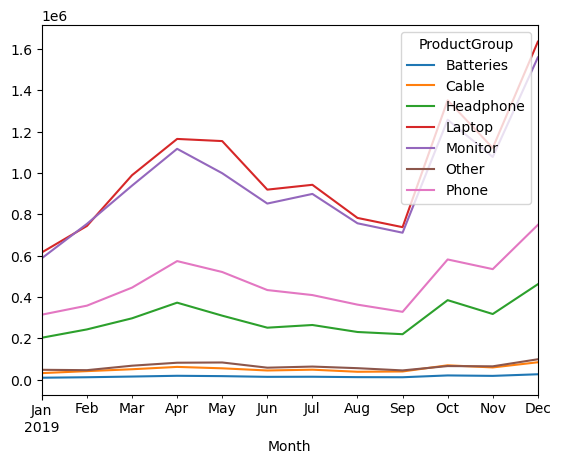

In [35]:
# Series de Tiempo: Ventas por ProductGroup en todo el tiempo de la serie
pd.pivot_table(df, values='Total Sales', index=['Month'], columns=['ProductGroup'], aggfunc=sum).plot()

In [41]:
# Ventas de los top 5 productos de los últimos 4 meses
# Top 5 Ventas por producto de todos los tiempos / sin filtro de meses
df.groupby(['Product'])[cols_num + ['Total Sales']].sum()['Total Sales'].sort_values(ascending=False).head(5)

Product
Macbook Pro Laptop       8037600.00
iPhone                   4794300.00
ThinkPad Laptop          4129958.70
Google Phone             3319200.00
27in 4K Gaming Monitor   2435097.56
Name: Total Sales, dtype: float64

In [42]:
# Una forma simple de calcular los últimos 4 meses es poner una marca en las transacciones de estos meses así
df['Flag4m'] = 0
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,zipcode,ProductGroup,Total Sales,Flag4m
36497,176090,USB-C Charging Cable,1,11.95,2019-03-18 00:18:00,"546 Dogwood St, Seattle, WA 98101",2019-03-01,98101,Cable,11.95,0
171717,305186,Apple Airpods Headphones,1,150.00,2019-12-30 20:56:00,"987 Wilson St, San Francisco, CA 94016",2019-12-01,94016,Monitor,150.00,0
53688,192498,USB-C Charging Cable,1,11.95,2019-04-20 22:36:00,"100 Chestnut St, San Francisco, CA 94016",2019-04-01,94016,Cable,11.95,0
179137,312300,USB-C Charging Cable,2,11.95,2019-12-11 08:44:00,"961 9th St, Boston, MA 02215",2019-12-01,02215,Cable,23.90,0
41920,181272,Lightning Charging Cable,1,14.95,2019-04-18 16:11:00,"508 Pine St, San Francisco, CA 94016",2019-04-01,94016,Cable,14.95,0


In [44]:
# Actualiza la marca de los 4 meses
df.loc[df.Month == '2019-12-01', 'Flag4m'] = 1
df.loc[df.Month == '2019-11-01', 'Flag4m'] = 1
df.loc[df.Month == '2019-10-01', 'Flag4m'] = 1
df.loc[df.Month == '2019-09-01', 'Flag4m'] = 1

df4m = df[df['Flag4m'] == 1]

print('Listado de Ventas por Producto de los últimos 4 meses')
print('-------------------------------------------------------')
df4m.groupby(['Product'])[cols_num + ['Total Sales']].sum()['Total Sales'].sort_values(ascending=False).head(10)

Listado de Ventas por Producto de los últimos 4 meses
-------------------------------------------------------


Product
Macbook Pro Laptop           3224900.00
iPhone                       1880200.00
ThinkPad Laptop              1623983.76
Google Phone                 1288200.00
27in 4K Gaming Monitor        992134.56
Apple Airpods Headphones      934650.00
34in Ultrawide Monitor        930595.51
Flatscreen TV                 583500.00
Bose SoundSport Headphones    537046.29
27in FHD Monitor              443520.43
Name: Total Sales, dtype: float64

<Axes: xlabel='Product'>

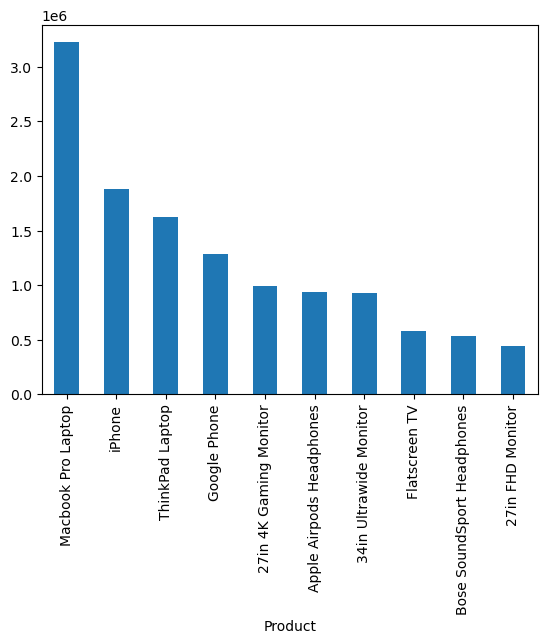

In [45]:
df4m.groupby(['Product'])[cols_num + ['Total Sales']].sum()[
    'Total Sales'].sort_values(ascending=False).head(10).plot.bar()

# Wrap Up
- Preparación de datos.
- Análisis Básico.
- Masajeo de datos.
- Análisis Univariable.
- Análisis Bivariado.
- Agrupaciones: groupby, pivot_table, crosstab.
- Otros casos: Generación de tablas pivotadas y resultados de crecimiento (pct_change).